In [3]:
import torch
from torch import nn
import torchvision.datasets as datasets 
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from models import *

import matplotlib.pyplot as plt

Loading the dataset and viewing samples

In [4]:
training_data = datasets.MNIST(root='datasets', download=True, train=True, transform=ToTensor())
testing_data = datasets.MNIST(root='datasets', download=True, train=False, transform=ToTensor())

training_loader = DataLoader(training_data, batch_size=64, shuffle=True)
testing_loader = DataLoader(testing_data, batch_size=64, shuffle=True)

Displaying a few sample images

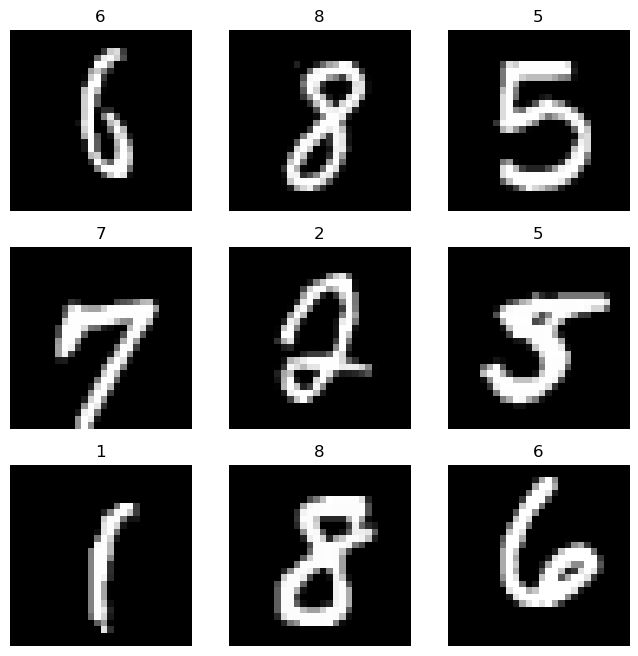

In [5]:
figure = plt.figure(figsize = (8,8))
rows, cols = 3, 3

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")

Getting a random sample

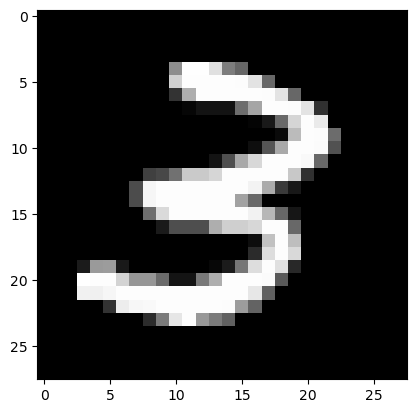

In [6]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
plt.imshow(img.squeeze(), cmap="gray")

Making a prediction

In [7]:
model_state_dict = torch.load('models/ConvModel/model.pth')

model = ConvModel()
model.load_state_dict(model_state_dict)
prediction = model(img)

print(prediction)

tensor([[1.2959e-04, 3.8649e-05, 6.9234e-04, 9.9574e-01, 1.0113e-05, 2.5725e-03,
         3.8737e-06, 1.1512e-05, 7.9099e-04, 8.7310e-06]],
       grad_fn=<SoftmaxBackward0>)


/home/xavier/anaconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
